<img src="./TS4_Logo_UTN.svg" align="right" width="150" /> 

##

***

## (950431) Teoría de Circuitos II

***

#### Profesor: Mariano Llamedo Soria  <llamedom@frba.utn.edu.ar>
#### Jefe de TPs: César Fuoco  <cfuoco@frba.utn.edu.ar>
#### Ayudante de TPs: Israel Pavelek <pavel@frba.utn.edu.ar>

####
***

# Trabajo Semanal # 4

#### Autor: *Moharos, David Santiago* <dmoharos@frba.utn.edu.ar>

####

***

####

### A partir de la siguiente plantilla:

####

<img src="./TS4_Plantilla.png" style="margin-left:auto; margin-right:auto"/>

***
***
####

### 1. Obtener la transferencia de máxima planicidad del filtro requerido.

####

***
***

####

In [30]:
from IPython.display import IFrame
IFrame("./TS4_Análisis_Ppal_01.pdf", width= 1000, height= 3750)

***
***
####

### 2. Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.

####

***
***

####

In [34]:
from IPython.display import IFrame
IFrame("./TS4_Análisis_Ppal_02.pdf", width= 1000, height= 1750)

***
***
####

### 3. Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).

####

***
***

####

In [39]:
from IPython.display import IFrame
IFrame("./TS4_Análisis_Ppal_03.pdf", width= 1000, height= 2400)

***
***
####

### 4. Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.

####

***
***

####

In [43]:
from IPython.display import IFrame
IFrame("./TS4_Análisis_Ppal_04.pdf", width= 1000, height= 1250)

***
***
####

### Bonus:

### +10 💎 Simulación numérica

####

***
***

####

#---------------------------------------------------------------------------------------------#
 
-- ε: Grado de libertad de la funcion --
 
ε = sqrt(10^(α_max/10)-1)
 
ε = 0.509
ε^2 = 0.259
 
#---------------------------------------------------------------------------------------------#
 
-- N: Orden del filtro --
 
α_min = 10*log(1 + ε^2*ω_s^(2*N))
Para N= 1: ¿att = 7.112 dB >= α_min= 30?
Para N= 2: ¿att = 18.279 dB >= α_min= 30?
Para N= 3: ¿att = 30.259 dB >= α_min= 30?
 
N= 3
 
#---------------------------------------------------------------------------------------------#
 
-- p_i: Polos en el semiplano izquierdo --
 
p_0= (-0.7983214183605379+0j)
p_1= (-0.39918929081973176+0.6913647289323849j)
p_2= (-0.39918929081973176-0.6913647289323849j)
 
#---------------------------------------------------------------------------------------------#
 
-- Función transferencia T(s): --
 
 
#---------------------------------------------------------------------------------------------#
 
-- Módul

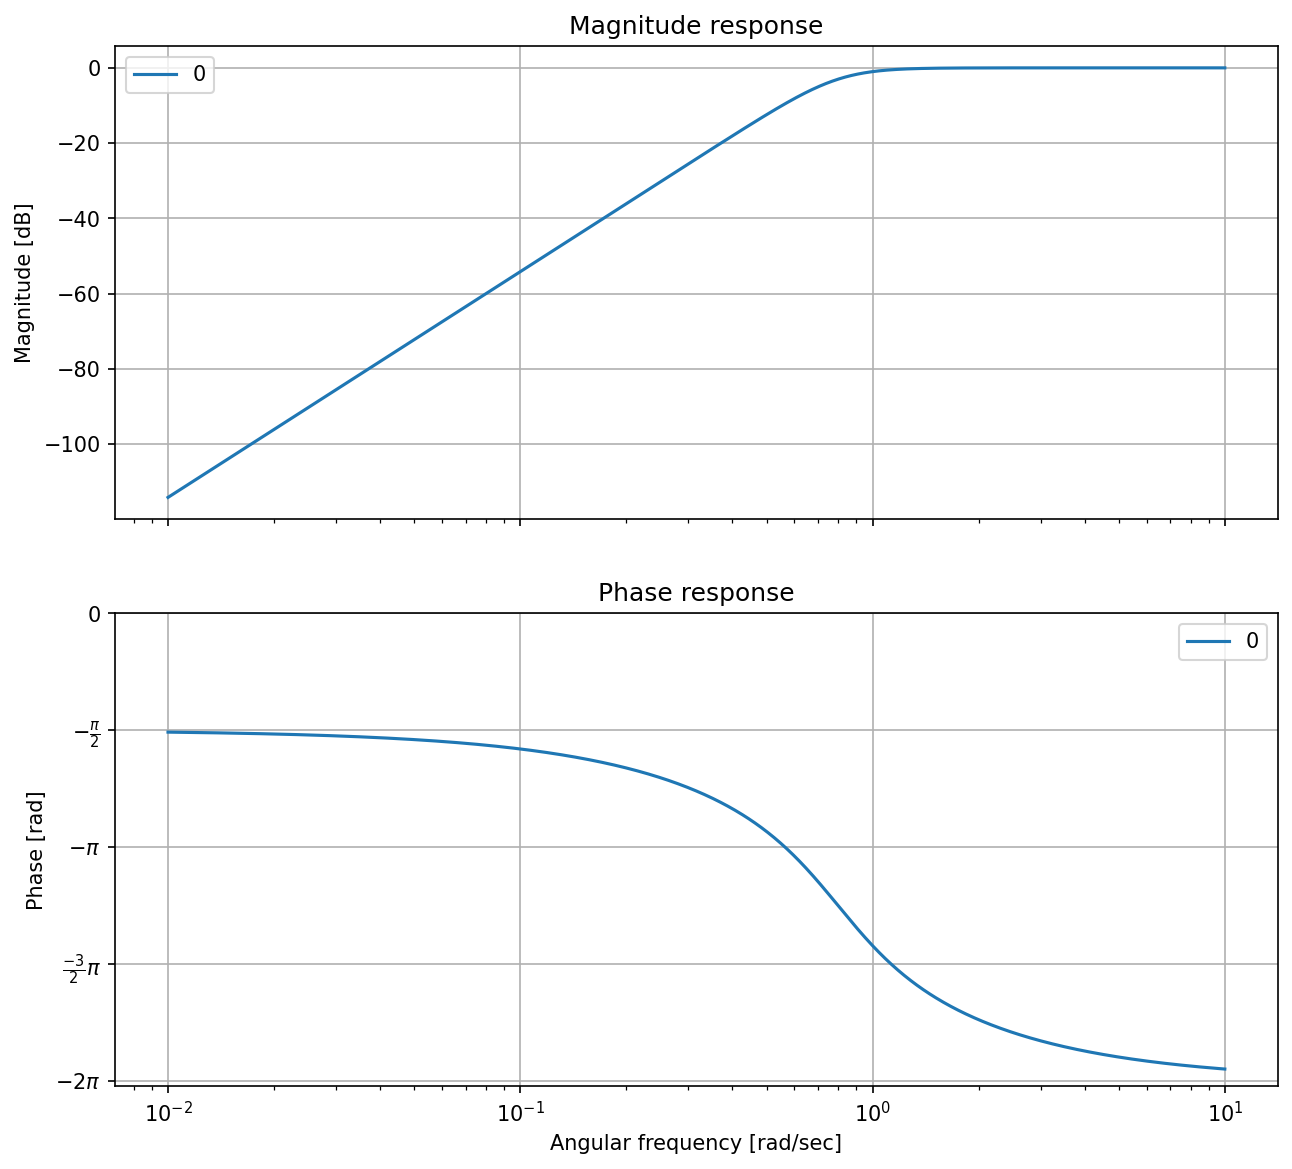

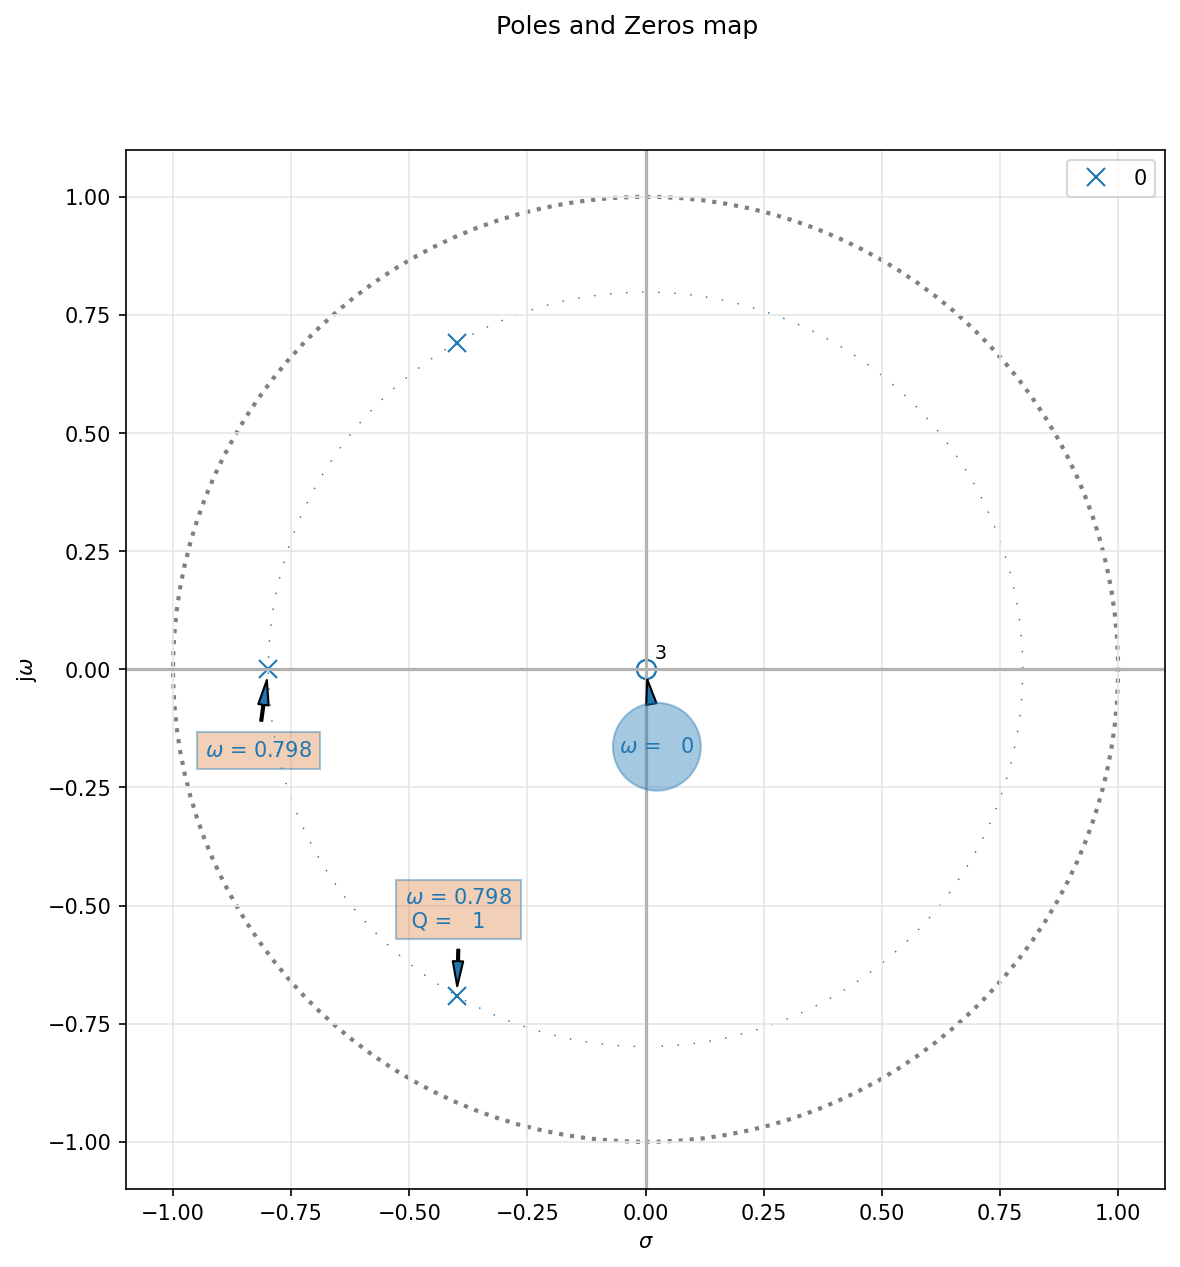

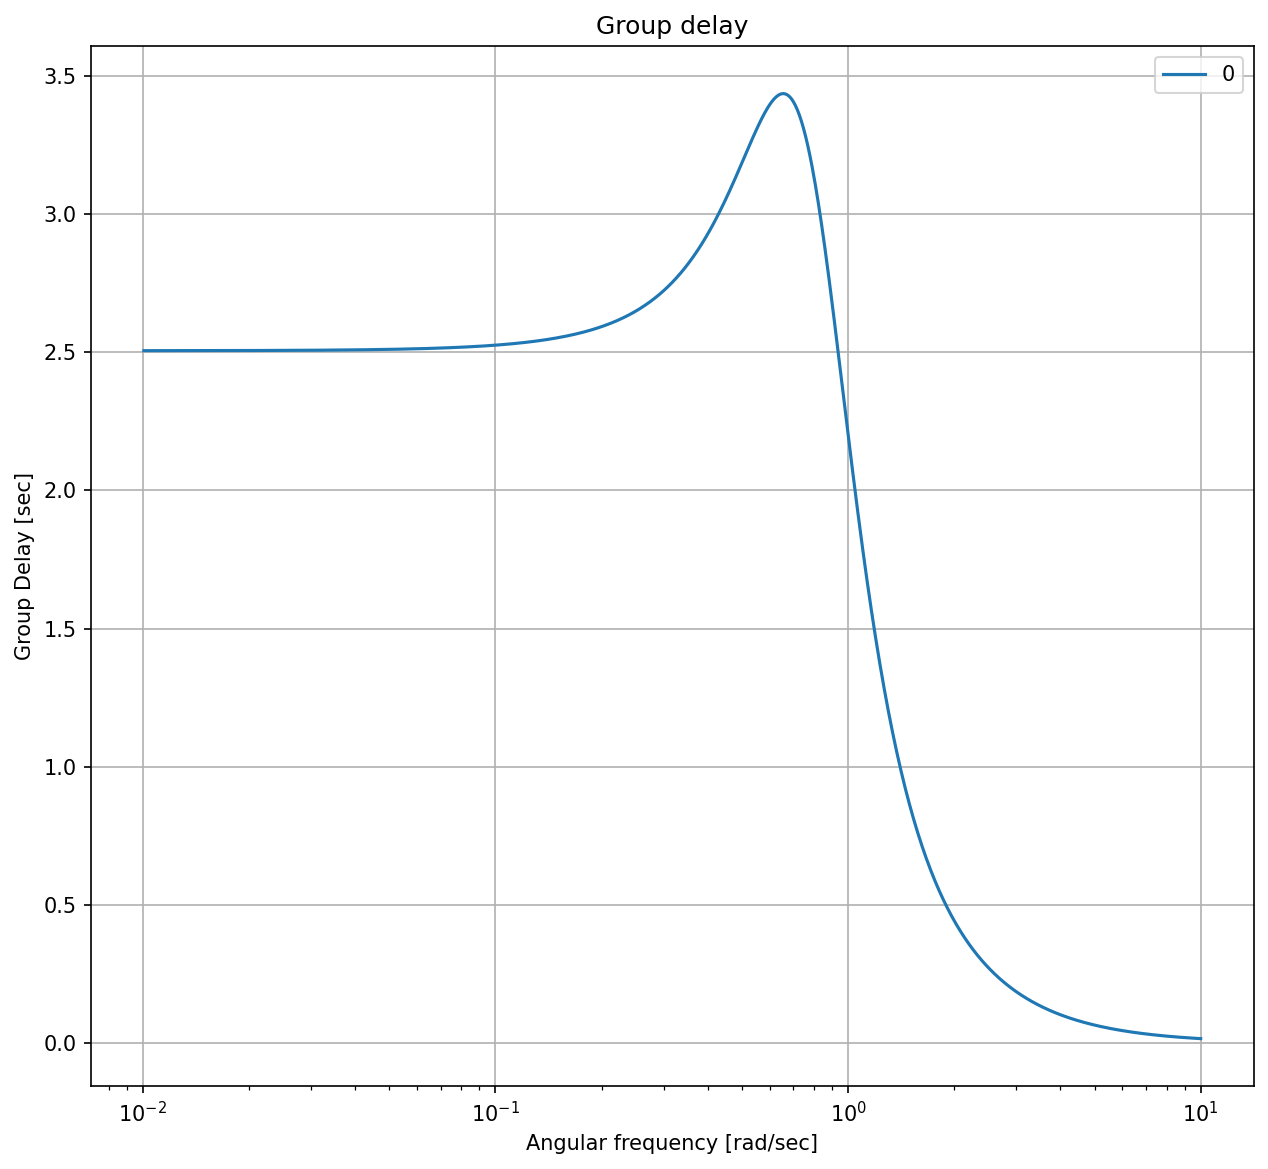

In [45]:
#-------------------------------------------------------------------------------------------------------------------#

# Inicializamos e importamos módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.signal as sig

fig_sz_x = 10
fig_sz_y = 9
fig_dpi = 150 # dpi

fig_font_size = 12

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
#plt.rcParams.update({'font.size':fig_font_size})

#-------------------------------------------------------------------------------------------------------------------#

# Importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys
from pytc2.sistemas_lineales import pretty_print_bicuad_omegayq
from pytc2.sistemas_lineales import tf2sos_analog
from pytc2.sistemas_lineales import pretty_print_SOS
from pytc2.general import print_subtitle

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos e^2
alfa_max = 1    # dB
alfa_min = 30   # dB
omega_p = 1     # norm omega_p
omega_s = 4     # norm omega_s

eps = np.sqrt(10**(alfa_max/10)-1)

print('#---------------------------------------------------------------------------------------------#')
print(' ')
print('-- ε: Grado de libertad de la funcion --')
print(' ')

print('ε = sqrt(10^(α_max/10)-1)')

print(' ')

print('ε = {:3.3f}'.format(eps))
print('ε^2 = {:3.3f}'.format(eps**2))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos N
# Iteramos alfa_min
print(' ')
print('-- N: Orden del filtro --')
print(' ')

# -- Para máxima planicidad --

print('α_min = 10*log(1 + ε^2*ω_s^(2*N))')

for N in range(1,10):
    att = 10 * np.log10(1 + eps**2*omega_s**(2*N))
    print('Para N= {:d}: ¿att = {:3.3f} dB >= α_min= {:d}?'.format(N, att, alfa_min))
    if att >= alfa_min:
        break
print(' ')

# N es el mismo que para máxima planicidad
N= 3
print('N= {:d}'.format(N))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# De la resolución analítica, obtenemos |T(jw)|^2:
num_hp = [1, 0, 0, 0]
den_hp = [1, 1.5967, 1.2747, 0.5088]

# Imprimimos las raíces del denominador y verificamos que coinciden con la resolución analítica:
# Nota: np.roots(den) devuelve TODAS las raíces del denominador. 
# Para el análisis, nos quedamos con aquellas que se encuentran en el semiplano izquierdo


print(' ')
print('-- p_i: Polos en el semiplano izquierdo --')
print(' ')

den_aux= np.array(np.roots(den_hp))
num_p= 0
for i in range(len(np.roots(den_hp))):
    if den_aux[i].real < 0:
        print('p_{:d}= {}'.format(num_p, den_aux[i]))
        num_p+=1
        
print(' ')
print('#---------------------------------------------------------------------------------------------#')


#-------------------------------------------------------------------------------------------------------------------#

# Obtenemos la transferencia T(s) con la función TransferFunction(num, den)
"""
TransferFunction
Definition : TransferFunction(*system, **kwargs)

Linear Time Invariant system class in transfer function form.

Represents the system as the continuous-time transfer function  or the discrete-time transfer function , where  are elements of the numerator num,  are elements of the denominator den, and N == len(b) - 1, M == len(a) - 1. TransferFunction systems inherit additional functionality from the lti, respectively the dlti classes, depending on which system representation is used.

Parameters
*system: arguments
The TransferFunction class can be instantiated with 1 or 2 arguments. The following gives the number of input arguments and their interpretation:

1: lti or dlti system: (StateSpace, TransferFunction or ZerosPolesGain)

2: array_like: (numerator, denominator)

dt: float, optional
Sampling time [s] of the discrete-time systems. Defaults to None (continuous-time). Must be specified as a keyword argument, for example, dt=0.1.

See Also
ZerosPolesGain, StateSpace, lti, dlti tf2ss, tf2zpk, tf2sos

Notes
Changing the value of properties that are not part of the TransferFunction system representation (such as the A, B, C, D state-space matrices) is very inefficient and may lead to numerical inaccuracies. It is better to convert to the specific system representation first. For example, call sys = sys.to_ss() before accessing/changing the A, B, C, D system matrices.

If (numerator, denominator) is passed in for *system, coefficients for both the numerator and denominator should be specified in descending exponent order (e.g. s^2 + 3s + 5 or z^2 + 3z + 5 would be represented as [1, 3, 5])

Examples
Construct the transfer function :

>>> from scipy import signal
>>> num = [1, 3, 3]
>>> den = [1, 2, 1]
>>> signal.TransferFunction(num, den)
TransferFunctionContinuous(
array([1., 3., 3.]),
array([1., 2., 1.]),
dt: None
)
Construct the transfer function  with a sampling time of 0.1 seconds:

>>> signal.TransferFunction(num, den, dt=0.1)
TransferFunctionDiscrete(
array([1., 3., 3.]),
array([1., 2., 1.]),
dt: 0.1
)
"""
T_hp= sig.TransferFunction(num_hp, den_hp)

#-------------------------------------------------------------------------------------------------------------------#

# Transformamos (factorizamos) la T(s) en secciones de segundo orden (SOS) con la función tf2sos_analog()
"""
def tf2sos_analog(num, den, pairing='nearest'):
    Parameters
    ----------
    tfa : TYPE
        DESCRIPTION.
    tfb : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    Example
    -------

    z, p, k = tf2zpk(num, den)
    
    sos = zpk2sos_analog(z, p, k, pairing = pairing)

    return sos
"""
#T_hp_sos = tf2sos_analog(num_hp, den_hp)

#-------------------------------------------------------------------------------------------------------------------#

# Imprimimos la T(s) en formato T(s)= num/den con la funcion pretty_print_SOS():

"""
Los SOS siempre deben definirse como:

mySOS= ( [ a1_1 a2_1 a3_1 b1_1 b2_1 b3_1 ] [ a1_2 a2_2 a3_2 b1_2 b2_2 b3_2 ] ... [ a1_N a2_N a3_N b1_N b2_N b3_N ])

siendo:
      s^2 a1_i + s a2_i + a3_i
T_i = -------------------------
      s^2 b1_i + s b2_i + b3_i

Parameters
mySOSTYPE
DESCRIPTION.

modeTYPE, optional
DESCRIPTION. The default is 'default'.

Raises
ValueError
DESCRIPTION.

Returns
None.
"""
print(' ')
print('-- Función transferencia T(s): --')
print(' ')

#pretty_print_SOS(T_hp_sos)

print(' ')
print('#---------------------------------------------------------------------------------------------#')
print(' ')

#-------------------------------------------------------------------------------------------------------------------#
# Representamos módulo, fase, diagrama de polos y ceros y retardo de fase con la analyze_sys() que tiene, entre
# otras cosas, indicadores (w0 y Q) de las singularidades en el diagrama de polos y ceros
"""
analyze_sys
Definition : analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, digital=False, fs=2*np.pi)

Analyzes the behavior of a linear system in terms of:

Magnitude and phase response or Bode plot

Pole-zero map

Group delay

The funcion admits the system to analyze (all_sys) as:

one or a list of TransferFunction objects

a matrix defining several second order sections (SOSs).

If all_sys is a SOS matrix, the function displays each of the SOS, and the system resulting frome the cascade of all SOS.

Parameters
all_syslist or (Nx5) matrix
The linear system to analyze. Wether a list of [scipy.signal.TransferFuncion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) objects or a matrix defining a cascade of SOS.

sys_namestring or list.
The labels or system description. Default: None

img_extstring ['none', 'png', 'svg'].
When different from 'none' the function save plot results to a file with the indicated extension. Default: 'none'

same_figsboolean
Use always the same figure numbers to plot results. When False, each call produce a new group of figures in a separate plot container. Default: True

annotationsboolean
Add annotations to the PZmap plot. When True, each singularity will be acompanied of the value of omega (i.e. the radial distance to the origin) and Q (i.e. measure of proximity to the jw axis). Default: True

digitalboolean
True to analyze the system as digital. Default: False

fsreal value.
The sampling frequency of the digital system. Valid only if digital is True. Default: 2*np.pi

Returns
None.

Example
Analyze a system with w0 = 1 rad/s and Q = sqrt(2)/2

>>> import numpy as np
>>> from scipy import signal as sig
>>> from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq
>>> Q = np.sqrt(2)/2
>>> w0 = 1
>>> # Cargamos la funcion transferencia como vectores de sus coeficientes.
>>> num = np.array([ w0**2 ])
>>> den = np.array([ 1., w0 / Q, w0**2 ])
>>> H1 = sig.TransferFunction( num, den )
>>> pretty_print_bicuad_omegayq(num,den)
>>> analyze_sys(H1, sys_name='mi ejemplo')
Compare the former system with two others with different Q values

>>> Q = 5
>>> w0 = 1
>>> num = np.array([ w0**2 ])
>>> den = np.array([ 1., w0 / Q, w0**2 ])
>>> H2 = sig.TransferFunction( num, den )
>>> analyze_sys([H1, H2], sys_name=['H1', 'H2'])
See Also
pretty_print_bicuad_omegayq() bodePlot() pzmap()
"""

print('-- Módulo, fase, diagrama de polos y ceros y retardo de fase --')
print(' ')

analyze_sys(T_hp)

#-------------------------------------------------------------------------------------------------------------------#

***
***
####

### Bonus:

### +10 💎 Simulación circuital.

####

***
***

####

<img src="./TS4_Circuito_Red_Pasiva_Normalizada.png" style="margin-left:auto; margin-right:auto"/>

<img src="./TS4_Circuito_Red_Pasiva_Normalizada_Respuesta_Modulo_Fase.png" style="margin-left:auto; margin-right:auto"/>